In [21]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [3]:
# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [70]:
# NN Architecture
class Net(nn.Module):
    def __init__(self, weight_initialization="default"):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(28*28, 300)
        self.layer2 = nn.Linear(300, 200)
        self.layer3 = nn.Linear(200, 10)
        
        if weight_initialization == "zeros":
          nn.init.zeros_(self.layer1.weight)
          nn.init.zeros_(self.layer2.weight)
          nn.init.zeros_(self.layer3.weight)

        if weight_initialization == "uniform":
          nn.init.uniform_(self.layer1.weight, -1, 1)
          nn.init.uniform_(self.layer2.weight, -1, 1)
          nn.init.uniform_(self.layer3.weight, -1, 1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        x = torch.softmax(self.layer3(x), dim=1)
        return x

In [76]:
def create_torch_NN(train_loader, test_loader, lr=0.1, num_epochs=10, batch_size=64, criterion=nn.CrossEntropyLoss(), weight_initialization="default"):
  net = Net(weight_initialization)
  optimizer = optim.SGD(net.parameters(), lr=lr)

  # Train the NN
  train_errors = []
  test_errors = []
  for epoch in range(num_epochs):
      train_acc = 0
      for i, (inputs, labels) in enumerate(train_loader):
          optimizer.zero_grad()
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          train_acc += accuracy_score(labels.detach().numpy(),np.argmax(outputs.detach().numpy(), axis=1))
      train_errors.append(1-(train_acc/len(train_loader)))
      test_acc = 0
      with torch.no_grad():
          for inputs, labels in test_loader:
              outputs = net(inputs)
              test_acc += accuracy_score(labels.detach().numpy(),np.argmax(outputs.detach().numpy(), axis=1))
      test_errors.append(1-(test_acc/len(test_loader)))
      print(f"Epoch {epoch+1} Test Error: {test_errors[-1]:.4f}")
  
  # plot learning curve 
  epochs = np.arange(1, 21, step=1)
  plt.figure(figsize=(10,6))
  plt.plot(epochs, train_errors, label='Train Error')
  plt.plot(epochs, test_errors, label='Test Error')
  plt.xlabel("Number of Epochs")
  plt.ylabel("Error Rate")
  plt.legend(loc='upper right')
  plt.xticks(epochs)
  plt.yticks(np.arange(0, 1.1, step=.1))

# Problem 3

Epoch 1 Test Error: 0.8865
Epoch 2 Test Error: 0.6555
Epoch 3 Test Error: 0.5744
Epoch 4 Test Error: 0.4421
Epoch 5 Test Error: 0.3636
Epoch 6 Test Error: 0.3448
Epoch 7 Test Error: 0.3385
Epoch 8 Test Error: 0.2919
Epoch 9 Test Error: 0.2737
Epoch 10 Test Error: 0.2621
Epoch 11 Test Error: 0.2541
Epoch 12 Test Error: 0.2496
Epoch 13 Test Error: 0.2461
Epoch 14 Test Error: 0.2449
Epoch 15 Test Error: 0.2416
Epoch 16 Test Error: 0.2407
Epoch 17 Test Error: 0.2389
Epoch 18 Test Error: 0.2389
Epoch 19 Test Error: 0.2392
Epoch 20 Test Error: 0.2360


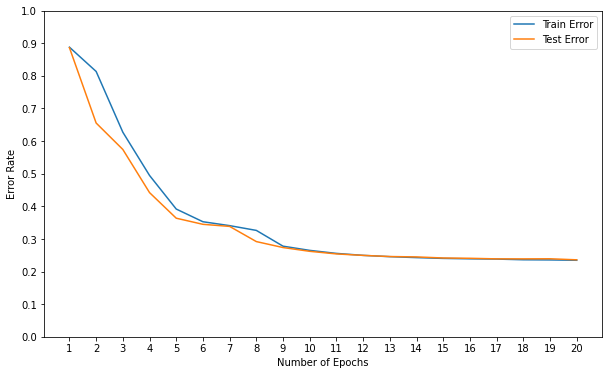

In [77]:
# NN Parameters
batch_size = 32
lr = 0.1
criterion = nn.CrossEntropyLoss()
num_epochs = 20
weight_initialization="default"

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)    

create_torch_NN(train_loader, test_loader, lr, num_epochs, batch_size, criterion, weight_initialization)

# Problem 4 

#### Initializing weights to zero

Epoch 1 Test Error: 0.8865
Epoch 2 Test Error: 0.8865
Epoch 3 Test Error: 0.8865
Epoch 4 Test Error: 0.8865
Epoch 5 Test Error: 0.8865
Epoch 6 Test Error: 0.8865
Epoch 7 Test Error: 0.8865
Epoch 8 Test Error: 0.8865
Epoch 9 Test Error: 0.8865
Epoch 10 Test Error: 0.8865
Epoch 11 Test Error: 0.8865
Epoch 12 Test Error: 0.8865
Epoch 13 Test Error: 0.8865
Epoch 14 Test Error: 0.8745
Epoch 15 Test Error: 0.7892
Epoch 16 Test Error: 0.7892
Epoch 17 Test Error: 0.7751
Epoch 18 Test Error: 0.7432
Epoch 19 Test Error: 0.7067
Epoch 20 Test Error: 0.6981


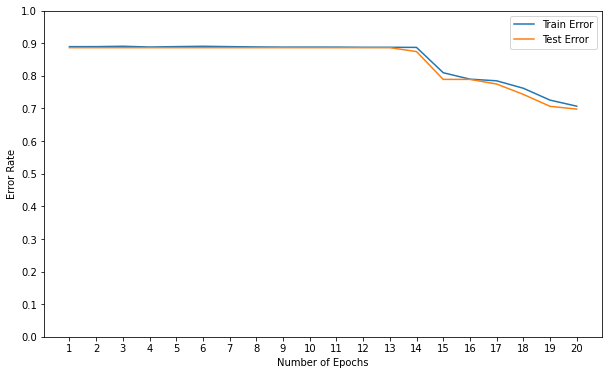

In [78]:
# NN Parameters
batch_size = 32
lr = 0.1
criterion = nn.CrossEntropyLoss()
num_epochs = 20
weight_initialization="zeros"

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)    

create_torch_NN(train_loader, test_loader, lr, num_epochs, batch_size, criterion, weight_initialization)

#### Initializing weights to uniform dist in range [-1,1]

Epoch 1 Test Error: 0.6241
Epoch 2 Test Error: 0.4629
Epoch 3 Test Error: 0.4436
Epoch 4 Test Error: 0.4361
Epoch 5 Test Error: 0.4312
Epoch 6 Test Error: 0.4305
Epoch 7 Test Error: 0.4276
Epoch 8 Test Error: 0.4266
Epoch 9 Test Error: 0.4248
Epoch 10 Test Error: 0.4235
Epoch 11 Test Error: 0.4228
Epoch 12 Test Error: 0.4229
Epoch 13 Test Error: 0.3625
Epoch 14 Test Error: 0.3466
Epoch 15 Test Error: 0.3419
Epoch 16 Test Error: 0.3392
Epoch 17 Test Error: 0.3370
Epoch 18 Test Error: 0.3355
Epoch 19 Test Error: 0.3352
Epoch 20 Test Error: 0.3340


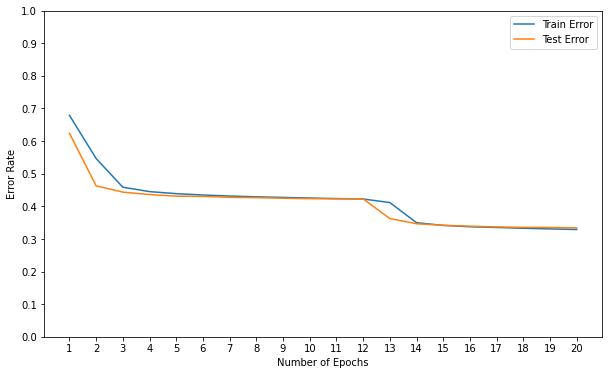

In [79]:
# NN Parameters
batch_size = 32
lr = 0.1
criterion = nn.CrossEntropyLoss()
num_epochs = 20
weight_initialization="uniform"

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)    

create_torch_NN(train_loader, test_loader, lr, num_epochs, batch_size, criterion, weight_initialization)